In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

In [2]:
df = json.load((open('ultimate_data_challenge.json')))

In [3]:
data = pd.DataFrame(df)

In [4]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


/home/streetraider92/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


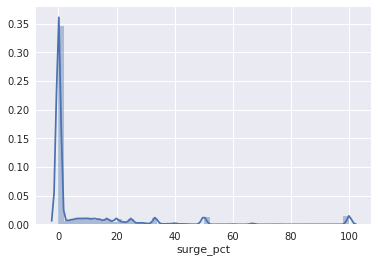

In [5]:
sns.distplot(data['surge_pct'])

/home/streetraider92/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


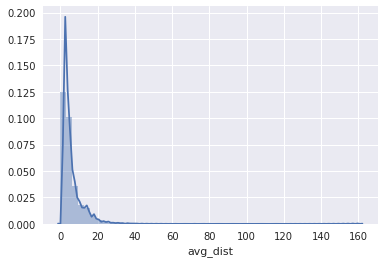

In [6]:
sns.distplot(data['avg_dist'])

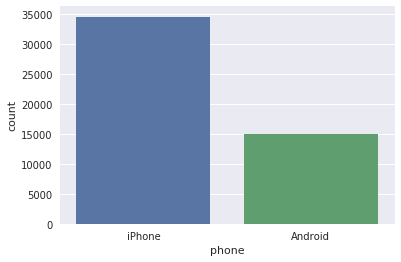

In [7]:
sns.countplot(data['phone'])

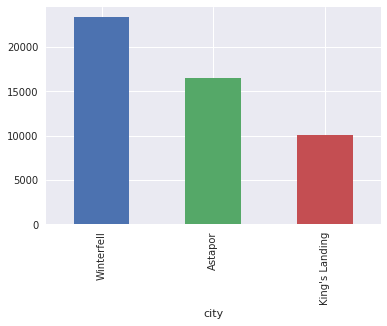

In [8]:
data.groupby(['city'])['avg_dist'].count().sort_values(ascending = False).plot(kind = 'bar')

/home/streetraider92/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


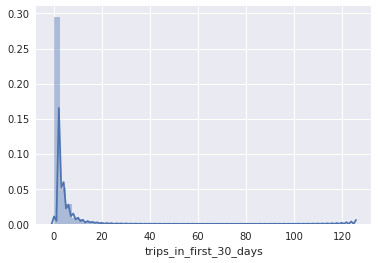

In [9]:
sns.distplot(data['trips_in_first_30_days'])

/home/streetraider92/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


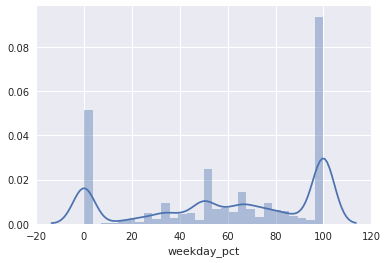

In [10]:
sns.distplot(data['weekday_pct'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [12]:
data['phone'] = data['phone'].fillna(data['phone'].mode()[0])

In [13]:
data.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2


In [14]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

In [15]:
data['signup_date'] = pd.to_datetime(data['signup_date'])

In [16]:
(data['last_trip_date'].loc[0] - data['signup_date'].loc[0]).days

143

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
data['days since signup to last trip'] = data['last_trip_date'] - data['signup_date']

In [19]:
data['days since signup to last trip'] = data['days since signup to last trip'].apply(lambda x: x.days)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                          50000 non-null float64
avg_rating_by_driver              49799 non-null float64
avg_rating_of_driver              41878 non-null float64
avg_surge                         50000 non-null float64
city                              50000 non-null object
last_trip_date                    50000 non-null datetime64[ns]
phone                             50000 non-null object
signup_date                       50000 non-null datetime64[ns]
surge_pct                         50000 non-null float64
trips_in_first_30_days            50000 non-null int64
ultimate_black_user               50000 non-null bool
weekday_pct                       50000 non-null float64
days since signup to last trip    50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [21]:
data = data.drop(['last_trip_date', 'signup_date', 'ultimate_black_user'], axis = 1)

In [22]:
data.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,weekday_pct,days since signup to last trip
0,3.67,5.0,4.7,1.1,King's Landing,iPhone,15.4,4,46.2,143
1,8.26,5.0,5.0,1.0,Astapor,Android,0.0,0,50.0,96
2,0.77,5.0,4.3,1.0,Astapor,iPhone,0.0,3,100.0,1


In [23]:
data['150_days_chrurn'] = data['days since signup to last trip'] >= 150

In [24]:
data = data.drop(['days since signup to last trip'], axis = 1)

In [25]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,weekday_pct,150_days_chrurn
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,46.2,False
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,82.4,False


In [26]:
data['150_days_chrurn'].sum()

12714

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import xgboost

In [28]:
cities_cols = pd.get_dummies(data['city'], drop_first = True)

In [29]:
phone_cols = pd.get_dummies(data['phone'], drop_first = True)

In [30]:
data = data.drop(['city', 'phone'], axis = 1)

In [31]:
data_final = pd.concat([data, cities_cols, phone_cols], axis = 1)

In [32]:
data_final.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,150_days_chrurn,King's Landing,Winterfell,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,46.2,False,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,False,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,False,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,80.0,True,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,False,0,1,0


In [33]:
X = data_final.drop(['150_days_chrurn'], axis = 1)

In [34]:
y = data_final['150_days_chrurn']

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.25)

In [36]:
ytrain.sum()

9532

In [37]:
len(ytrain)

37500

In [38]:
ytest.sum()

3182

In [39]:
from xgboost import XGBClassifier

In [40]:
xgb_clf = XGBClassifier(
 eta = 0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.5,
 objective = 'binary:logistic',
 colsample_bytree=0.4,
 nthread=4,
 scale_pos_weight=1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27)

In [41]:
xgb_clf.fit(Xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.4, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.5)

In [42]:
y_pred_xgb = xgb_clf.predict(Xtest)

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [43]:
accuracy_score(ytest, y_pred_xgb)

0.79744

In [44]:
roc_auc_score(ytest, xgb_clf.predict_proba(Xtest)[:,1])

0.8257199794022748

In [45]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(ytest, y_pred_xgb)

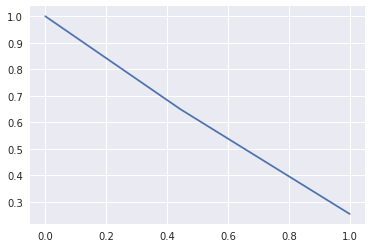

In [46]:
plt.plot(recall_rf, precision_rf)

In [47]:
print(classification_report(ytest, y_pred_xgb))

             precision    recall  f1-score   support

      False       0.83      0.92      0.87      9318
       True       0.65      0.44      0.53      3182

avg / total       0.78      0.80      0.78     12500



In [48]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [49]:
gsearch1 = GridSearchCV(estimator = XGBClassifier( eta = 0.1,
 n_estimators=140, 
 gamma=0.1,
 subsample=0.8,
 objective = 'binary:logistic',
 colsample_bytree=0.8,
 scale_pos_weight=1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test1, scoring='roc_auc',iid=False, cv=5)

In [50]:
gsearch1.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [51]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82050, std: 0.00264, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.82041, std: 0.00284, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.82052, std: 0.00284, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.82353, std: 0.00261, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.82369, std: 0.00266, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.82400, std: 0.00280, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.82216, std: 0.00304, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.82178, std: 0.00200, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.82228, std: 0.00322, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.81726, std: 0.00240, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.81891, std: 0.00279, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.81934, std: 0.00281, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 5

In [52]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}

In [53]:
gsearch2 = GridSearchCV(estimator = XGBClassifier(eta = 0.1,
 n_estimators=140, 
 gamma=0.1,
 subsample=0.8,
 objective = 'binary:logistic',
 colsample_bytree=0.8,
 scale_pos_weight=1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)

In [54]:
gsearch2.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [55]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82302, std: 0.00311, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.82299, std: 0.00292, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.82286, std: 0.00311, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.82390, std: 0.00270, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.82400, std: 0.00280, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.82347, std: 0.00270, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.82358, std: 0.00304, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.82340, std: 0.00272, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.82362, std: 0.00248, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 5, 'min_child_weight': 5},
 0.8239958741079777)

In [56]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

In [57]:
gsearch3 = GridSearchCV(estimator = XGBClassifier( eta = 0.1,
 n_estimators=140, 
 subsample=0.8,
 objective = 'binary:logistic',
 max_depth = 5,
 min_child_weight = 5,
 colsample_bytree=0.8,
 scale_pos_weight=1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)

In [58]:
gsearch3.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.1,
       eval_metric='error', gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=140,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [59]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82344, std: 0.00256, params: {'gamma': 0.0},
  mean: 0.82400, std: 0.00280, params: {'gamma': 0.1},
  mean: 0.82379, std: 0.00259, params: {'gamma': 0.2},
  mean: 0.82377, std: 0.00305, params: {'gamma': 0.3},
  mean: 0.82358, std: 0.00271, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.8239958741079777)

In [60]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [61]:
gsearch4 = GridSearchCV(estimator = XGBClassifier( eta = 0.1,
 n_estimators=177, 
 gamma = 0.1,
 objective = 'binary:logistic',
 max_depth = 5,
 min_child_weight = 5,
 scale_pos_weight=1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)

In [62]:
gsearch4.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=177,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=1),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [63]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82337, std: 0.00262, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.82386, std: 0.00345, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.82369, std: 0.00317, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.82384, std: 0.00261, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.82303, std: 0.00295, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.82341, std: 0.00307, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.82396, std: 0.00344, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.82402, std: 0.00273, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.82283, std: 0.00245, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.82352, std: 0.00279, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.82396, std: 0.00297, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.82419, std: 0.00283, params: {'colsample_bytree': 0.8, 'subsample'

In [64]:
param_test5 = {
 'scale_pos_weight':[i for i in range(1,5)]
}

In [65]:
gsearch5 = GridSearchCV(estimator = XGBClassifier( eta = 0.1,
 n_estimators=200, 
 gamma = 0.1,
 objective = 'binary:logistic',
 colsample_bytree = 0.9,
 subsample = 0.8,
 max_depth = 5,
 min_child_weight = 5,
 #class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test5, scoring='roc_auc',iid=False, cv=5)

In [66]:
gsearch5.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, eta=0.1, eval_metric='error', gamma=0.1,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'scale_pos_weight': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [67]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82310, std: 0.00329, params: {'scale_pos_weight': 1},
  mean: 0.82296, std: 0.00314, params: {'scale_pos_weight': 2},
  mean: 0.82302, std: 0.00324, params: {'scale_pos_weight': 3},
  mean: 0.82269, std: 0.00338, params: {'scale_pos_weight': 4}],
 {'scale_pos_weight': 1},
 0.8231031644924511)

In [68]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

In [69]:
gsearch6 = GridSearchCV(estimator = XGBClassifier( eta = 0.1,
 n_estimators=200, 
 gamma = 0.1,
 objective = 'binary:logistic',
 colsample_bytree = 0.8,
 subsample = 0.9,
 max_depth = 5,
 min_child_weight = 5,
 scale_pos_weight = 1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test6, scoring='roc_auc',iid=False, cv=5)

In [70]:
gsearch6.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [71]:
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82409, std: 0.00295, params: {'reg_alpha': 1e-05},
  mean: 0.82393, std: 0.00248, params: {'reg_alpha': 0.01},
  mean: 0.82399, std: 0.00286, params: {'reg_alpha': 0.1},
  mean: 0.82435, std: 0.00245, params: {'reg_alpha': 1},
  mean: 0.81461, std: 0.00320, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.8243526968915711)

In [87]:
param_test7 = {
 'eta':[0.1,0.01, 0.2, 0.02]
}

In [88]:
gsearch7 = GridSearchCV(estimator = XGBClassifier(
 n_estimators=200, 
 gamma = 0.1,
 objective = 'binary:logistic',
 colsample_bytree = 0.8,
 subsample = 0.9,
 max_depth = 5,
 min_child_weight = 5,
 scale_pos_weight = 1,
 class_weight = 'balanced',
 eval_metric = 'error',
 reg_alpha = 1,
 seed=27), 
 param_grid = param_test7, scoring='roc_auc',iid=False, cv=5)

In [89]:
gsearch7.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eval_metric='error',
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'eta': [0.1, 0.01, 0.2, 0.02]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [90]:
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82435, std: 0.00245, params: {'eta': 0.1},
  mean: 0.82435, std: 0.00245, params: {'eta': 0.01},
  mean: 0.82435, std: 0.00245, params: {'eta': 0.2},
  mean: 0.82435, std: 0.00245, params: {'eta': 0.02}],
 {'eta': 0.1},
 0.8243526968915711)

In [95]:
param_test8 = {
 'base_score':[0.45,0.5, 0.55]
}

In [96]:
gsearch8 = GridSearchCV(estimator = XGBClassifier(eta = 0.1,
 n_estimators=200, 
 gamma = 0.1,
 objective = 'binary:logistic',
 colsample_bytree = 0.8,
 subsample = 0.9,
 max_depth = 5,
 min_child_weight = 5,
 scale_pos_weight = 1,
 class_weight = 'balanced',
 eval_metric = 'error',
 reg_alpha = 1,
 seed=27), 
 param_grid = param_test8, scoring='roc_auc',iid=False, cv=5)

In [97]:
gsearch8.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'base_score': [0.45, 0.5, 0.55]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [98]:
gsearch8.grid_scores_, gsearch8.best_params_, gsearch8.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82464, std: 0.00268, params: {'base_score': 0.45},
  mean: 0.82435, std: 0.00245, params: {'base_score': 0.5},
  mean: 0.82450, std: 0.00288, params: {'base_score': 0.55}],
 {'base_score': 0.45},
 0.8246362896967842)

In [99]:
final_model = XGBClassifier( eta = 0.01,
 base_score = 0.45,
 n_estimators=200, 
 gamma = 0.1,
 objective = 'binary:logistic',
 colsample_bytree = 0.8,
 subsample = 0.9,
 max_depth = 5,
 min_child_weight = 5,
 scale_pos_weight = 1,
 class_weight = 'balanced',
 eval_metric = 'error',
 reg_alpha = 1,
 seed=27)

In [100]:
final_model.fit(Xtrain, ytrain)

XGBClassifier(base_score=0.45, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.01,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9)

In [101]:
y_pred = final_model.predict(Xtest)

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [102]:
accuracy_score(ytest, y_pred)

0.79872

In [103]:
roc_auc_score(ytest, final_model.predict_proba(Xtest)[:,1])

0.8274943375817154

In [104]:
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(ytest, y_pred)

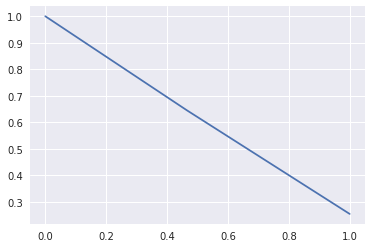

In [105]:
plt.plot(recall_xgb, precision_xgb)

In [156]:
auc(recall_xgb, precision_xgb)

0.6233267153850067

In [158]:
y_best_xgb_probas = final_model.predict(Xtest)

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [159]:
roc_auc_score(ytest, y_best_xgb_probas)

0.6906765815816566

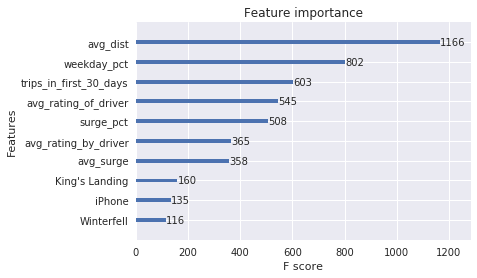

In [152]:
from xgboost import plot_importance
plot_importance(final_model)
plt.show()

In [128]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
weekday_pct               50000 non-null float64
150_days_chrurn           50000 non-null bool
King's Landing            50000 non-null uint8
Winterfell                50000 non-null uint8
iPhone                    50000 non-null uint8
dtypes: bool(1), float64(6), int64(1), uint8(3)
memory usage: 2.9 MB


In [129]:
avg_rating_by_driver = data_final['avg_rating_by_driver'].median()

In [130]:
avg_rating_by_driver 

5.0

In [135]:
data_final['avg_rating_by_driver'] =  data_final['avg_rating_by_driver'].fillna(avg_rating_by_driver)

In [132]:
avg_rating_of_driver = data_final['avg_rating_of_driver'].median()

In [133]:
avg_rating_of_driver

4.9

In [134]:
 data_final['avg_rating_of_driver'] =  data_final['avg_rating_of_driver'].fillna(avg_rating_of_driver)

In [136]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
weekday_pct               50000 non-null float64
150_days_chrurn           50000 non-null bool
King's Landing            50000 non-null uint8
Winterfell                50000 non-null uint8
iPhone                    50000 non-null uint8
dtypes: bool(1), float64(6), int64(1), uint8(3)
memory usage: 2.9 MB


### Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [106]:
n_space = np.array([50, 100, 200, 500])
criterion_vals = ['gini', 'entropy']
max_features_vals = ['auto', 'sqrt', 'log2']
max_depth_sp = [3,4,5,6]

param_grid = {'n_estimators': n_space, 'criterion' : criterion_vals, 'max_features':max_features_vals, 'max_depth': max_depth_sp}

In [110]:
clf_rf = RandomForestClassifier(random_state=42)

In [111]:
rf_clf_tuning = GridSearchCV(clf_rf, param_grid, cv=5)

In [137]:
X = data_final.drop(['150_days_chrurn'], axis = 1)

y = data_final['150_days_chrurn']

In [138]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.25)

In [139]:
rf_clf_tuning.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 50, 100, 200, 500]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
print("Tuned RF Parameters: {}".format(rf_clf_tuning.best_params_)) 
print("Best score is {}".format(rf_clf_tuning.best_score_))

Tuned RF Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
Best score is 0.7882666666666667


In [142]:
best_rf_clf = RandomForestClassifier(random_state=42, max_depth = 6, n_estimators = 100)

In [143]:
best_rf_clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [144]:
y_best_rf_probas = best_rf_clf.predict_proba(Xtest)[:,1]

In [146]:
y_best_pred = best_rf_clf.predict(Xtest)

In [148]:
print(classification_report(ytest, y_best_pred))

             precision    recall  f1-score   support

      False       0.81      0.93      0.87      9318
       True       0.65      0.36      0.47      3182

avg / total       0.77      0.79      0.77     12500



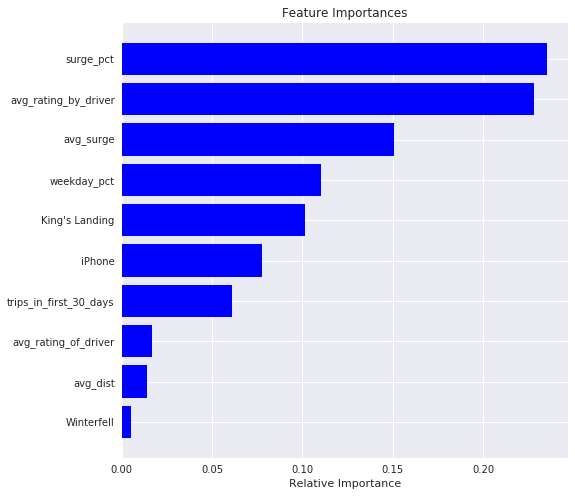

In [150]:
fig, ax = plt.subplots(figsize=(8,8))
features = X.columns
importances = best_rf_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [153]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(ytest, y_best_rf_probas)

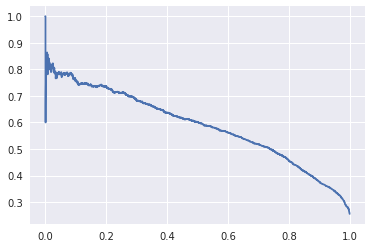

In [154]:
plt.plot(recall_rf, precision_rf)

In [155]:
auc(recall_rf, precision_rf)

0.5883121487061427

In [157]:
roc_auc_score(ytest, y_best_rf_probas)

0.8126750344588288